## A multi-layer neural network predicting MNIST hand-written digits

In [1]:
from simpledl.DLTrainer import DLTrainer
from simpledl.ModelManager import ModelManager
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create our own trainer with its own load_data function
class MyDLTrainer(DLTrainer):
    def load_data(self, test_size=0.1):
        """load digits dataset"""
        src_X, src_Y = load_digits(return_X_y=True)
        X = src_X / np.max(src_X) # normalize
        Y = OneHotEncoder(sparse=False, categories='auto').fit_transform(src_Y.reshape(-1, 1))
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)
        src_X = src_X.T
        src_Y = src_Y.T
        X = X.T
        Y = Y.T
        X_train = X_train.T
        X_test = X_test.T
        Y_train = Y_train.T
        Y_test = Y_test.T
        return src_X, src_Y, X, Y, X_train, Y_train, X_test, Y_test

trainer = MyDLTrainer()
trainer.load_data()
src_X, src_Y, X, Y, X_train, Y_train, X_test, Y_test = trainer.load_data(test_size=0.5)
dim_input, dim_output = X.shape[0], Y.shape[0]

In [3]:
# Create our model
mgr = ModelManager()
mgr.create_model(dims=[dim_input, 10, 10, dim_output],
                activations=[DLTrainer.nonlin_relu, DLTrainer.nonlin_relu, DLTrainer.nonlin_sigmoid],
                default_alpha=0.0007,
                default_lambda=0.001)

Cost after 0 epochs: 207.2328349390275 (accuracy: 0.09020044543429843)
Cost after 2500 epochs: 0.8489054892537998 (accuracy: 0.9142538975501113)
Cost after 5000 epochs: 0.5656033190922352 (accuracy: 0.9432071269487751)
Cost after 7500 epochs: 0.45197716748831585 (accuracy: 0.9576837416481069)
Cost after 10000 epochs: 0.3902849563499771 (accuracy: 0.9610244988864142)
Cost after 12500 epochs: 0.35122694037416863 (accuracy: 0.9688195991091314)
Cost after 15000 epochs: 0.32181069213624885 (accuracy: 0.9699331848552338)
Cost after 17500 epochs: 0.29918708133786953 (accuracy: 0.9732739420935411)
ModelManager updated with trained model. Dev accuracy: 0.932146829810901


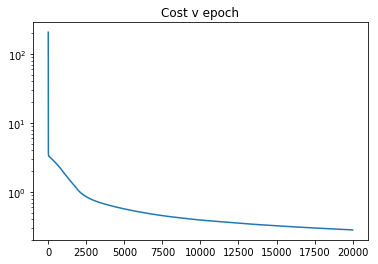

In [4]:
# Train the model
updated_model, costs, accuracy = trainer.train(mgr, X_train, Y_train, 20000, 2500)

f, ax = plt.subplots()
ax.plot(costs)
ax.set_yscale('log')
ax.set_title("Cost v epoch")

mgr.update_model(updated_model)
print("ModelManager updated with trained model. Dev accuracy: {}".format(trainer.correct(mgr.model, X_test, Y_test)))

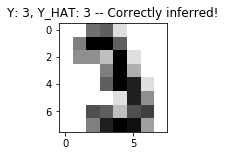

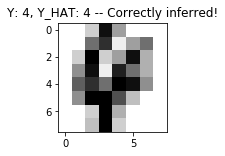

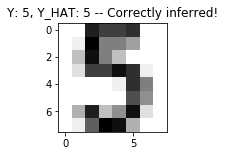

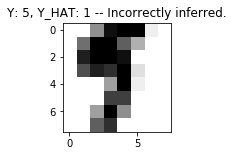

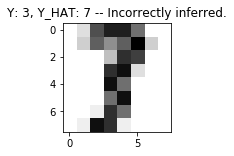

In [5]:
# Visualize a few examples

def show_generic_with_prediction(x, y, trainer):
    f, ax = plt.subplots(figsize=(2,2))
    y_hat = trainer.predict(mgr.model, x).ravel()[0]
    msg = "Correctly inferred!" if y == y_hat else "Incorrectly inferred."
    ax.imshow(x.reshape(8, 8), cmap=plt.cm.gray_r)
    ax.set_title("Y: {}, Y_HAT: {} -- {}".format(y, y_hat, msg))

def show_example_with_prediction(index, trainer):
    x = X_test[:,index].reshape(-1, 1)
    y = np.argmax(Y_test[:,index])
    show_generic_with_prediction(x, y, trainer)

for i in range(5):
    show_example_with_prediction(np.random.choice(100), trainer)